# Telecom Churn Case Study
* Submitted by:
   
    Saurabh Dongare (saa.dongare@gmail.com)


### Business Problem Overview
1. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.
2. Retaining high profitable customers is the number one business goal.
3. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.
4. Usage-based churn: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.
5. In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

### Understanding Customer Behaviour During Churn
In churn prediction, we assume that there are three phases of customer lifecycle
1. The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.
2. The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)
3. The ‘churn’ phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.
4. Since we are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase

### Modelling Goals 
 Build models to predict churn. The predictive model that we are going to build will serve two purposes
 1. It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.
 2. It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.
 
 #### After identifying important predictors, display them visually.
 #### Finally, recommend strategies to manage customer churn based on your observations.

### Steps to build the model:
1. Preprocess data (convert columns to appropriate formats, handle missing values, etc.)
2. Conduct appropriate exploratory analysis to extract useful insights (whether directly useful for business or for eventual modelling/feature engineering).
3. Derive new features.
4. Reduce the number of variables using PCA.
5. Train a variety of models, tune model hyperparameters, etc. (handle class imbalance using appropriate techniques).
6. Evaluate the models using appropriate evaluation metrics. Note that is is more important to identify churners than the non-churners accurately - choose an appropriate evaluation metric which reflects this business goal.
7. Finally, choose a model based on some evaluation metric.

##  DATA UNDERSTANDING AND CLEANING

### Import libraries and load datafile

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Data Read

In [2]:
# Load csv data file
telecom_origional = pd.read_csv('telecom_churn_data.csv')
# Creating a back up of the dataframe
telecom = telecom_origional.copy()

In [3]:
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [4]:
telecom.shape

(99999, 226)

<b>There are 99999 records and 226 columns.</b>

### Statistical summary

In [5]:
telecom.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [6]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


### Describe Categorical variables

In [7]:
cat_var = [cname for cname in telecom.columns if telecom[cname].dtype == "object"]
telecom[cat_var].describe()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
count,99999,99398,98899,98340,98392,98232,96377,95239,25153,25571,26339,25922
unique,1,1,1,1,30,31,31,30,30,31,31,30
top,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/30/2014,7/31/2014,8/31/2014,9/29/2014,6/30/2014,7/31/2014,8/31/2014,9/29/2014
freq,99999,99398,98899,98340,16960,17288,14706,22623,1888,1813,1998,2329


## Missing Value Treatment

In [10]:
telecom.isnull().sum()

mobile_number               0
circle_id                   0
loc_og_t2o_mou           1018
std_og_t2o_mou           1018
loc_ic_t2o_mou           1018
last_date_of_month_6        0
last_date_of_month_7      601
last_date_of_month_8     1100
last_date_of_month_9     1659
arpu_6                      0
arpu_7                      0
arpu_8                      0
arpu_9                      0
onnet_mou_6              3937
onnet_mou_7              3859
onnet_mou_8              5378
onnet_mou_9              7745
offnet_mou_6             3937
offnet_mou_7             3859
offnet_mou_8             5378
offnet_mou_9             7745
roam_ic_mou_6            3937
roam_ic_mou_7            3859
roam_ic_mou_8            5378
roam_ic_mou_9            7745
roam_og_mou_6            3937
roam_og_mou_7            3859
roam_og_mou_8            5378
roam_og_mou_9            7745
loc_og_t2t_mou_6         3937
                        ...  
arpu_2g_9               74077
night_pck_user_6        74846
night_pck_

In [11]:
null_series = pd.Series(round(100*(telecom.isnull().sum(axis=0)/len(telecom.index)), 2).sort_values(ascending = False))
null_series

count_rech_2g_6             74.85
date_of_last_rech_data_6    74.85
count_rech_3g_6             74.85
av_rech_amt_data_6          74.85
max_rech_data_6             74.85
total_rech_data_6           74.85
arpu_3g_6                   74.85
arpu_2g_6                   74.85
night_pck_user_6            74.85
fb_user_6                   74.85
arpu_3g_7                   74.43
count_rech_2g_7             74.43
fb_user_7                   74.43
count_rech_3g_7             74.43
arpu_2g_7                   74.43
av_rech_amt_data_7          74.43
max_rech_data_7             74.43
night_pck_user_7            74.43
total_rech_data_7           74.43
date_of_last_rech_data_7    74.43
night_pck_user_9            74.08
date_of_last_rech_data_9    74.08
fb_user_9                   74.08
arpu_2g_9                   74.08
max_rech_data_9             74.08
arpu_3g_9                   74.08
total_rech_data_9           74.08
av_rech_amt_data_9          74.08
count_rech_3g_9             74.08
count_rech_2g_

In [12]:
#columns having more than 70% null values
null_series[null_series >= 70].size

40

#### There are 40 columns which has over 70% missing values. Before dropping any column let's filter the high value customers first.

## High Value Customers

### Below are the columns used for filtering high-value customers which can't be dropped
1. total_rech_data_6 
2. total_rech_data_7 
3. av_rech_amt_data_6 
4. av_rech_amt_data_7

So, let's treat the missing values for these columns.

In [13]:
print(telecom.total_rech_data_6.describe()); print('\n############################################')
print(telecom.total_rech_data_7.describe()); print('\n############################################')
print(telecom.av_rech_amt_data_6.describe()); print('\n############################################')
print(telecom.av_rech_amt_data_7.describe()); print('\n############################################')

count    25153.000000
mean         2.463802
std          2.789128
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max         61.000000
Name: total_rech_data_6, dtype: float64

############################################
count    25571.000000
mean         2.666419
std          3.031593
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max         54.000000
Name: total_rech_data_7, dtype: float64

############################################
count    25153.000000
mean       192.600982
std        192.646318
min          1.000000
25%         82.000000
50%        154.000000
75%        252.000000
max       7546.000000
Name: av_rech_amt_data_6, dtype: float64

############################################
count    25571.000000
mean       200.981292
std        196.791224
min          0.500000
25%         92.000000
50%        154.000000
75%        252.000000
max       4365.000000
Name: av_rech_amt_data_7, dtype: floa

#### Variables are numeric and the minimum value is 1 (not zero) 
#### missing -- indicating that no recharge was done in this month. 
#### Thus, missing values can be imputed with 0.

In [14]:
telecom.total_rech_data_6.fillna(value=0, inplace=True)
telecom.total_rech_data_7.fillna(value=0, inplace=True)
telecom.total_rech_data_8.fillna(value=0, inplace=True)
telecom.total_rech_data_9.fillna(value=0, inplace=True)

telecom.av_rech_amt_data_6.fillna(value=0, inplace=True)
telecom.av_rech_amt_data_7.fillna(value=0, inplace=True)
telecom.av_rech_amt_data_8.fillna(value=0, inplace=True)
telecom.av_rech_amt_data_9.fillna(value=0, inplace=True)

### New DERIVED Columns for Total Data Recharge Amount

In [15]:
telecom["total_rech_data_amt_6"] = telecom["total_rech_data_6"]*telecom['av_rech_amt_data_6']
telecom["total_rech_data_amt_7"] = telecom["total_rech_data_7"]*telecom['av_rech_amt_data_7']
telecom["total_rech_data_amt_8"] = telecom["total_rech_data_8"]*telecom['av_rech_amt_data_8']
telecom["total_rech_data_amt_9"] = telecom["total_rech_data_9"]*telecom['av_rech_amt_data_9']

#### We can drop total_rech_data_* and av_rech_amt_data_*

In [16]:
drop_data_columns = ["total_rech_data_6", "total_rech_data_7", "total_rech_data_8", "total_rech_data_9", 
                'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']
telecom.drop(drop_data_columns, axis=1, inplace=True)

#### We can drop the columns with high missing values now

In [17]:
# Columns with more than 70% missing values
colmns_missing_data = round(100*(telecom.isnull().sum()/len(telecom.index)), 2)
print(colmns_missing_data[colmns_missing_data >= 70])

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_8    73.66
date_of_last_rech_data_9    74.08
max_rech_data_6             74.85
max_rech_data_7             74.43
max_rech_data_8             73.66
max_rech_data_9             74.08
count_rech_2g_6             74.85
count_rech_2g_7             74.43
count_rech_2g_8             73.66
count_rech_2g_9             74.08
count_rech_3g_6             74.85
count_rech_3g_7             74.43
count_rech_3g_8             73.66
count_rech_3g_9             74.08
arpu_3g_6                   74.85
arpu_3g_7                   74.43
arpu_3g_8                   73.66
arpu_3g_9                   74.08
arpu_2g_6                   74.85
arpu_2g_7                   74.43
arpu_2g_8                   73.66
arpu_2g_9                   74.08
night_pck_user_6            74.85
night_pck_user_7            74.43
night_pck_user_8            73.66
night_pck_user_9            74.08
fb_user_6                   74.85
fb_user_7     

In [18]:
drop_missing_values_columns = colmns_missing_data[colmns_missing_data > 70].index
telecom.drop(drop_missing_values_columns, axis=1, inplace=True)
print('Number of columns droped here  = ', len(drop_missing_values_columns))
print('Dataframe Shape: ', telecom.shape)

Number of columns droped here  =  32
Dataframe Shape:  (99999, 190)


## Filter high-value customers

In [19]:
avg_rech_amt_6_7 = (telecom["total_rech_amt_6"] + telecom["total_rech_data_amt_6"] + 
                      telecom["total_rech_amt_7"] + telecom["total_rech_data_amt_7"]) / 2.0
amont_70_pc = np.percentile(avg_rech_amt_6_7, 70.0)
amont_70_pc

478.0

#### 70 percentile of first two month's avg recharge amount: 478

In [20]:
telecom = telecom[avg_rech_amt_6_7 >= amont_70_pc]
print('Dataframe Shape: ', telecom.shape)

Dataframe Shape:  (30001, 190)


In [21]:
colmns_missing_data = round(100*(telecom.isnull().sum()/len(telecom.index)), 2)
print(colmns_missing_data[colmns_missing_data >= 10])

Series([], dtype: float64)


### Now, 'telecom' dataframe possesses only high value customer's data

### Identify Churn & Tag Churners

In [22]:
# Identify Churn
X = telecom["total_ic_mou_9"] + telecom["total_og_mou_9"] + telecom["vol_2g_mb_9"] + telecom["vol_3g_mb_9"]
telecom["churn"] = np.where(X, 0, 1)
telecom["churn"].head(10)

0     1
7     1
8     0
21    0
23    0
33    0
38    0
41    0
48    0
53    0
Name: churn, dtype: int32

#### Columns to be dropped: all columns ending with "_9" or contains "sep"

In [23]:
drop_fourth_month_columns = [col for col in telecom.columns if '_9' in col]
drop_fourth_month_columns +=[col for col in telecom.columns if 'sep' in col]
telecom.drop(drop_fourth_month_columns, axis=1, inplace=True)

print('Number of columns droped here  = ', len(drop_fourth_month_columns))
print('Dataframe Shape: ', telecom.shape);

Number of columns droped here  =  46
Dataframe Shape:  (30001, 145)


### Identify columns that have no varience & Drop

In [24]:
# Identify columns that have no varience
telecom_unique_count = telecom.nunique().sort_values(ascending=False)
telecom_unique_count

mobile_number           30001
arpu_7                  29084
arpu_6                  29072
arpu_8                  28073
total_og_mou_7          23684
total_og_mou_6          23519
total_og_mou_8          22316
offnet_mou_7            21263
offnet_mou_6            21220
offnet_mou_8            20163
total_ic_mou_7          20161
total_ic_mou_6          20121
total_ic_mou_8          19581
loc_ic_mou_6            18524
loc_og_mou_7            18502
loc_ic_mou_7            18496
loc_og_mou_6            18348
loc_ic_mou_8            18069
loc_og_mou_8            17582
onnet_mou_7             16987
onnet_mou_6             16890
std_og_mou_7            15958
std_og_mou_6            15922
onnet_mou_8             15872
loc_og_t2m_mou_7        15674
loc_og_t2m_mou_6        15625
loc_ic_t2m_mou_7        15547
loc_ic_t2m_mou_6        15461
loc_og_t2m_mou_8        15130
loc_ic_t2m_mou_8        15122
                        ...  
spl_ic_mou_6               78
sachet_2g_7                35
sachet_2g_

In [25]:
telecom_unique_count_is_one = telecom_unique_count[telecom_unique_count == 1]
drop_no_varience_columns = list(telecom_unique_count_is_one.index)

telecom.drop(drop_no_varience_columns, axis=1, inplace=True)
print('Number of columns dropped here  = ', len(drop_no_varience_columns))
print('Dataframe Shape: ', telecom.shape);

Number of columns dropped here  =  13
Dataframe Shape:  (30001, 132)


### Treat row-wise missing values

In [26]:
# sum it up to check how many rows have all missing values
print("Rows with all NULL values =",  telecom.isnull().all(axis=1).sum())

# sum of misisng values in each row
rows_missing_data = telecom.isnull().sum(axis=1)
rows_missing_data[rows_missing_data > 0]

Rows with all NULL values = 0


0        54
77       27
91        1
111      27
188      28
191       1
358      27
364      27
414      28
423      27
527      27
539      54
588       1
603       2
679       1
687      82
690      28
723      28
788      27
845      28
895      27
933      27
934      27
1138     54
1255     27
1374      1
1489     54
1500     55
1524     28
1555     56
         ..
98790    55
98823    28
98838     1
98872    28
98943    81
98962    27
98971     1
99000    27
99034    27
99070    27
99135    81
99142    81
99195    27
99224     2
99246    27
99296    27
99313     1
99323    27
99338    81
99391    27
99398    28
99436    28
99515     1
99611    27
99625    27
99672     1
99700    27
99790    55
99827    27
99851    56
Length: 1838, dtype: int64

In [27]:
# small percentage of rows has more than or equal to 27 missing values
drop_rows = telecom.isnull().sum(axis=1) >= 27
print("Number of rows with >= 27 missing values = {}".format(drop_rows.sum()))
print("     % of rows with >= 27 missing values = {} %".format(drop_rows.sum()/telecom.shape[0]*100))

# drop rows with missing values greater >= 27
telecom = telecom[telecom.isnull().sum(axis=1) < 27]
print('Dataframe Shape after dropping rows: ', telecom.shape); 

Number of rows with >= 27 missing values = 1497
     % of rows with >= 27 missing values = 4.989833672210926 %
Dataframe Shape after dropping rows:  (28504, 132)


In [28]:
rows_missing_data = telecom.isnull().sum(axis=1)
#print(rows_missing_data)
print(rows_missing_data[rows_missing_data > 0])

91       1
191      1
588      1
603      2
679      1
1374     1
1913     1
2777     1
3757     1
4284     1
4814     1
4934     1
5187     1
5449     1
5798     1
5926     1
7304     1
7399     1
7567     1
7662     1
7914     1
8118     1
8159     1
8281     1
8454     1
8680     1
8979     1
9012     1
9027     1
9068     1
        ..
93165    1
93483    1
93755    1
93769    1
94057    1
94089    1
94241    1
94719    1
94970    1
95531    1
95638    1
95709    1
96053    1
96387    1
96403    1
96480    1
96522    1
96524    1
96715    2
97077    1
97158    1
97926    1
98753    1
98789    1
98838    1
98971    1
99224    2
99313    1
99515    1
99672    1
Length: 341, dtype: int64


In [29]:
# Missing Values Treatment: continue
# look at the COLUMN summary again
df = round(100*(telecom.isnull().sum()/len(telecom.index)), 2)
df[df > 0]

date_of_last_rech_6    0.12
date_of_last_rech_7    0.18
date_of_last_rech_8    0.97
dtype: float64

Note: The remaining missing values are in date columns, before imputing convert them into appropreate values for analysis.

### Fix Dates & convert to meaningful numbers

In [30]:
# covert date columns to python datetime format
date_vars = ["date_of_last_rech_6",  "date_of_last_rech_7", "date_of_last_rech_8"]
telecom[date_vars].head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
7,6/27/2014,7/25/2014,8/26/2014
8,6/25/2014,7/31/2014,8/30/2014
21,6/30/2014,7/31/2014,8/31/2014
23,6/18/2014,7/7/2014,8/24/2014
33,6/30/2014,7/30/2014,8/26/2014


In [31]:
# convert to datetime
for col in date_vars:
    telecom[col] = pd.to_datetime(telecom[col])

print(telecom[date_vars].info())
telecom[date_vars].head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28504 entries, 7 to 99997
Data columns (total 3 columns):
date_of_last_rech_6    28471 non-null datetime64[ns]
date_of_last_rech_7    28452 non-null datetime64[ns]
date_of_last_rech_8    28228 non-null datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 890.8 KB
None


,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
7,2014-06-27,2014-07-25,2014-08-26
8,2014-06-25,2014-07-31,2014-08-30
21,2014-06-30,2014-07-31,2014-08-31
23,2014-06-18,2014-07-07,2014-08-24
33,2014-06-30,2014-07-30,2014-08-26


In [32]:
# Create new days columns, instead of date
import datetime
last_date_of_month_6 = datetime.datetime.strptime("30-06-2014", "%d-%m-%Y")
last_date_of_month_7 = datetime.datetime.strptime("31-07-2014", "%d-%m-%Y")
last_date_of_month_8 = datetime.datetime.strptime("31-08-2014", "%d-%m-%Y")

telecom["rech_days_left_6"] = (last_date_of_month_6 - telecom.date_of_last_rech_6).astype('timedelta64[D]')
telecom["rech_days_left_7"] = (last_date_of_month_7 - telecom.date_of_last_rech_7).astype('timedelta64[D]')
telecom["rech_days_left_8"] = (last_date_of_month_8 - telecom.date_of_last_rech_8).astype('timedelta64[D]')

day_columns = ["rech_days_left_6", "rech_days_left_7", "rech_days_left_8"]
#print(telecom[day_columns].head(10))
print(telecom[day_columns].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28504 entries, 7 to 99997
Data columns (total 3 columns):
rech_days_left_6    28471 non-null float64
rech_days_left_7    28452 non-null float64
rech_days_left_8    28228 non-null float64
dtypes: float64(3)
memory usage: 890.8 KB
None


In [33]:
# Drop all old date columns: add dates columns to drop_column list
telecom.drop(date_vars, axis=1, inplace=True)
telecom1 = telecom.copy()

print('Number of columns droped here  = ', len(date_vars))
print('Dataframe Shape: ', telecom.shape)

Number of columns droped here  =  3
Dataframe Shape:  (28504, 132)


In [34]:
# Missing Values Treatment: continue
# look at the COLUMN summary again
df = round(100*(telecom.isnull().sum()/len(telecom.index)), 2)
df[df > 0]

rech_days_left_6    0.12
rech_days_left_7    0.18
rech_days_left_8    0.97
dtype: float64

In [35]:
telecom[['rech_days_left_6', 'rech_days_left_7', 'rech_days_left_8']].describe()

,rech_days_left_6,rech_days_left_7,rech_days_left_8
count,28471.000000,28452.000000,28228.000000
mean,3.388044,3.486504,4.147478
std,4.490864,4.289200,5.104752
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000
50%,2.000000,2.000000,3.000000
75%,4.000000,5.000000,6.000000
max,29.000000,30.000000,30.000000


In [36]:
# Mean & Median are different: imputing with median value for recharge days left 
telecom.loc[np.isnan(telecom['rech_days_left_6']), ['rech_days_left_6']] = telecom['rech_days_left_6'].median()
telecom.loc[np.isnan(telecom['rech_days_left_7']), ['rech_days_left_7']] = telecom['rech_days_left_7'].median()
telecom.loc[np.isnan(telecom['rech_days_left_8']), ['rech_days_left_8']] = telecom['rech_days_left_8'].median()

#round(100*(telecom.isnull().sum()/len(telecom.index)), 2)
print("\nTotal Number of missing values in the data frame = {}".format(telecom.isnull().sum().sum()))
print('Dataframe Shape: ', telecom.shape);


Total Number of missing values in the data frame = 0
Dataframe Shape:  (28504, 132)


### Oulier Assessment
- Use data distribution to find outliers

In [37]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
telecom.describe(percentiles=[0.01,.25,.5,.75,.90,.95,.99])

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,churn,rech_days_left_6,rech_days_left_7,rech_days_left_8
count,2.850400e+04,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,...,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000
mean,7.001214e+09,560.375015,570.628779,526.058843,265.250016,275.933639,244.727998,379.885653,389.853704,350.226224,...,172.280825,179.720267,157.068192,444.792240,527.562376,469.506616,0.055992,3.386437,3.483792,4.136367
std,6.877760e+05,448.960314,480.075654,500.754116,458.723036,482.671988,464.022072,479.249454,502.604354,485.648594,...,422.692163,445.647191,414.405091,1417.124391,1481.601197,1644.912839,0.229911,4.488511,4.285755,5.081219
min,7.000000e+09,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,7.000027e+09,22.563410,38.657330,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000623e+09,317.360500,322.602500,254.759000,20.140000,19.530000,14.840000,80.732500,80.352500,60.490000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,7.001218e+09,485.169000,488.899500,442.791000,89.985000,89.910000,74.085000,231.550000,231.825000,199.875000,...,0.000000,0.000000,0.000000,92.000000,100.000000,25.000000,0.000000,2.000000,2.000000,3.000000
75%,7.001807e+09,698.914000,704.999500,672.453250,298.760000,304.895000,257.415000,494.372500,506.467500,457.432500,...,139.397500,138.992500,96.437500,392.000000,575.000000,342.000000,0.000000,4.000000,5.000000,6.000000
90%,7.002166e+09,987.580200,1001.338500,991.085300,760.844000,801.711000,688.281000,898.931000,931.197000,844.924000,...,590.464000,614.064000,526.659000,1051.400000,1374.000000,1118.800000,0.000000,10.000000,9.000000,10.000000
95%,7.002285e+09,1232.633400,1268.472050,1267.392650,1135.715000,1206.173000,1101.550000,1256.088500,1292.275500,1187.343500,...,948.150000,985.739500,878.063500,2025.000000,2424.000000,2268.000000,1.000000,14.000000,13.000000,15.000000


#### There are many outliers present in the data, as seen from the above statistics.
#### We will use Percentile Capping (Winsorization) technique to overcome the problem of outliers.
#### Winsorization (Winsorizing) at 1st and 99th percentile implies values that are less than the value at 1st percentile are replaced by the value at 1st percentile, and values that are greater than the value at 99th percentile are replaced by the value at 99th percentile.


In [38]:
for col in telecom.columns:
    percentiles = telecom[col].quantile([0.01,0.99]).values
    telecom[col][telecom[col] <= percentiles[0]] = percentiles[0]
    telecom[col][telecom[col] >= percentiles[1]] = percentiles[1]

In [39]:
# check the outlier treatment values
telecom.describe(percentiles=[0.01,.25,.5,.75,.90,.95,.99])

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,churn,rech_days_left_6,rech_days_left_7,rech_days_left_8
count,2.850400e+04,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,...,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000
mean,7.001214e+09,551.502445,561.132208,515.596578,256.673444,266.818585,235.450437,372.041229,381.152935,340.192489,...,163.685854,170.474464,148.073081,399.919961,479.925633,412.691883,0.055992,3.351986,3.446885,4.116054
std,6.873196e+05,350.594815,356.539215,377.975808,402.715938,422.457393,396.913596,430.473655,446.815813,413.498525,...,357.677405,377.593897,343.895422,830.377414,984.593269,922.787553,0.229911,4.344050,4.133408,4.990150
min,7.000027e+09,22.563410,38.657330,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,7.000027e+09,22.567688,38.657650,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000623e+09,317.360500,322.602500,254.759000,20.140000,19.530000,14.840000,80.732500,80.352500,60.490000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,7.001218e+09,485.169000,488.899500,442.791000,89.985000,89.910000,74.085000,231.550000,231.825000,199.875000,...,0.000000,0.000000,0.000000,92.000000,100.000000,25.000000,0.000000,2.000000,2.000000,3.000000
75%,7.001807e+09,698.914000,704.999500,672.453250,298.760000,304.895000,257.415000,494.372500,506.467500,457.432500,...,139.397500,138.992500,96.437500,392.000000,575.000000,342.000000,0.000000,4.000000,5.000000,6.000000
90%,7.002166e+09,987.580200,1001.338500,991.085300,760.844000,801.711000,688.281000,898.931000,931.197000,844.924000,...,590.464000,614.064000,526.659000,1051.400000,1374.000000,1118.800000,0.000000,10.000000,9.000000,10.000000
95%,7.002285e+09,1232.633400,1268.472050,1267.392650,1135.715000,1206.173000,1101.550000,1256.088500,1292.275500,1187.343500,...,948.150000,985.739500,878.063500,2025.000000,2424.000000,2268.000000,1.000000,14.000000,13.000000,15.000000


### Save the cleaned data in new file

In [40]:
# write treated telecom file
telecom.to_csv("telecom_churn_data_clean.csv", sep=',', index=False)

## EXPLORATORY DATA ANALYSIS (EDA)
1. Univariate 
2. Bivatiate Analysis
3. Check imbalance in data-set (dependent variable)

### Dependent Variable: check data imbalance

In [41]:
#checking whether data is imbalanced or not
churn  = telecom["churn"].value_counts()
churn_rate = churn[1]/(churn[1] + churn[0])

print("Total Churn Count     = {}".format(churn[1]))
print("Total Not-Churn Count = {}".format(churn[0]))
print("Churn Rate            = {:.2f}%".format(churn_rate*100))

Total Churn Count     = 1596
Total Not-Churn Count = 26908
Churn Rate            = 5.60%


OBSERVATION: Data is highly imbalanced, we need to balance it before creating the model

### Univariate Analysis on  'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8'

In [42]:
df_not_churn = telecom[telecom["churn"] == 0]
df_churn     = telecom[telecom["churn"] == 1]

In [43]:
#claculation of mean for churn or non churn
print("Mean:")
print(np.mean(df_not_churn["total_rech_num_6"]))
print(np.mean(df_churn["total_rech_num_6"]))
print("median:")
print(np.median(df_not_churn["total_rech_num_6"]))
print(np.median(df_churn["total_rech_num_6"]))

print("Quantiles:")
print(np.percentile(df_not_churn["total_rech_num_6"],np.arange(0,100,25)))
print(np.percentile(df_churn["total_rech_num_6"],np.arange(0,100,25)))

Mean:
11.702319012932957
13.984962406015038
median:
9.0
12.0
Quantiles:
[ 2.  6.  9. 14.]
[ 2.  8. 12. 18.]


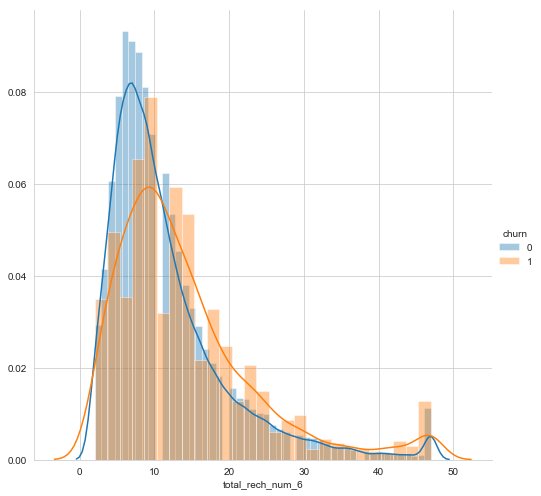

In [44]:
#feature importance of total_rech_num_6
#now use histogram or probability density function for univiraite analysis
#one variable analysis
#this is important to know feature importance in classification
sns.set_style('whitegrid')
sns.FacetGrid(telecom,hue='churn',size=7).map(sns.distplot,"total_rech_num_6").add_legend()

#its difficult to know about the churning rate based on total_rech_num_6 feature as overlaped data.

In [45]:
print("Mean:")
print(np.mean(df_not_churn["total_rech_num_7"]))
print(np.mean(df_churn["total_rech_num_7"]))
print("median:")
print(np.median(df_not_churn["total_rech_num_7"]))
print(np.median(df_churn["total_rech_num_7"]))

print("Quantiles:")
print(np.percentile(df_not_churn["total_rech_num_7"],np.arange(0,100,25)))
print(np.percentile(df_churn["total_rech_num_7"],np.arange(0,100,25)))

Mean:
11.751672365095882
13.12719298245614
median:
9.0
10.0
Quantiles:
[ 2.  6.  9. 15.]
[ 2.  7. 10. 17.]


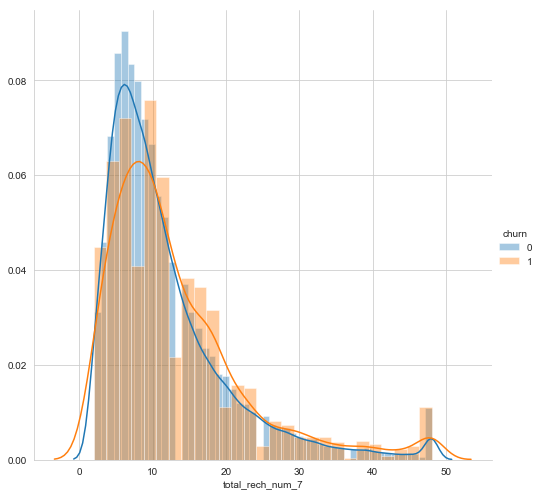

In [46]:
#feature importance of total_rech_num_7
#now use histogram or probability density function for univiraite analysis
#one variable analysis
#this is important to know feature importance in classification
sns.set_style('whitegrid')
sns.FacetGrid(telecom,hue='churn',size=7).map(sns.distplot,"total_rech_num_7").add_legend()

#its difficult to know about the churning rate based on total_rech_data_7 feature as overlaped data.

In [47]:
print("Mean:")
print(np.mean(df_not_churn["total_rech_num_8"]))
print(np.mean(df_churn["total_rech_num_8"]))
print("median:")
print(np.median(df_not_churn["total_rech_num_8"]))
print(np.median(df_churn["total_rech_num_8"]))

print("Quantiles:")
print(np.percentile(df_not_churn["total_rech_num_8"],np.arange(0,100,25)))
print(np.percentile(df_churn["total_rech_num_8"],np.arange(0,100,25)))

Mean:
10.391110450423666
6.915413533834586
median:
8.0
5.0
Quantiles:
[ 1.  5.  8. 13.]
[1. 3. 5. 9.]


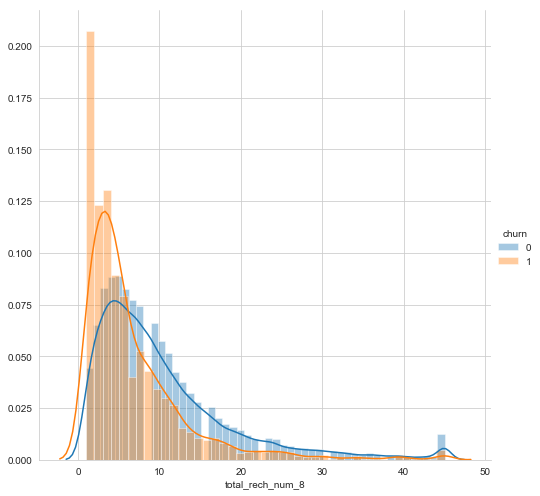

In [48]:
#feature importance of total_rech_num_8
#now use histogram or probability density function for univiraite analysis
#one variable analysis
#this is important to know feature importance in classification
sns.FacetGrid(telecom,hue='churn',size=7).map(sns.distplot,"total_rech_num_8").add_legend()
#its difficult to know about the churning rate based on total_rech_data_8 feature as overlaped data.

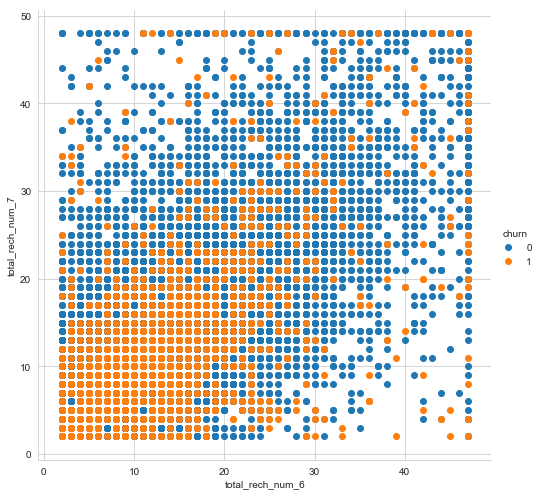

In [49]:
sns.FacetGrid(telecom,hue='churn',size=7).map(plt.scatter,"total_rech_num_6","total_rech_num_7").add_legend()

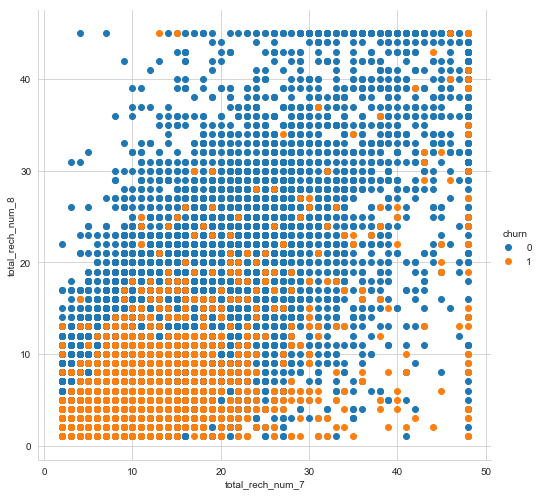

In [50]:
sns.FacetGrid(telecom,hue='churn',size=7).map(plt.scatter,"total_rech_num_7","total_rech_num_8").add_legend()

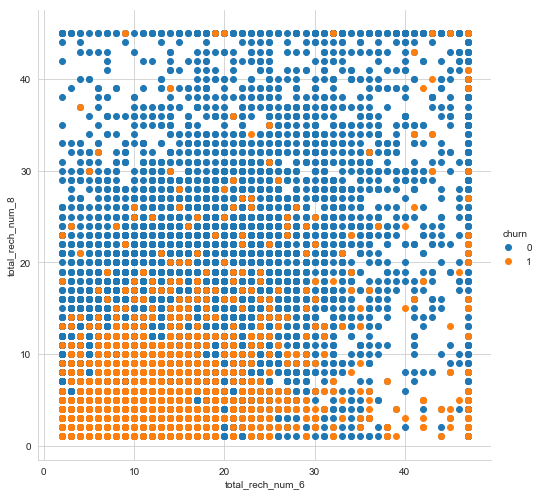

In [51]:
sns.FacetGrid(telecom,hue='churn',size=7).map(plt.scatter,"total_rech_num_6","total_rech_num_8").add_legend()

### We could see a pattern emerging here. At the bottom, there are plenty of churning happening compare to higher values of "total_rech_num_*".

### Univariate Analysis on 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',

In [52]:
print("Mean:")
print(np.mean(df_not_churn["total_rech_amt_6"]))
print(np.mean(df_churn["total_rech_amt_6"]))
print("median:")
print(np.median(df_not_churn["total_rech_amt_6"]))
print(np.median(df_churn["total_rech_amt_6"]))

print("Quantiles:")
print(np.percentile(df_not_churn["total_rech_amt_6"],np.arange(0,100,25)))
print(np.percentile(df_churn["total_rech_amt_6"],np.arange(0,100,25)))

Mean:
644.9324044893723
766.4762656641606
median:
564.0
669.0
Quantiles:
[  0. 366. 564. 820.]
[  0. 450. 669. 984.]


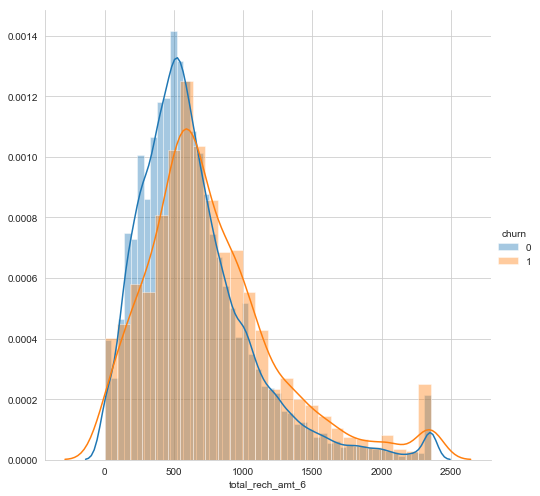

In [53]:
#feature importance of total_rech_amt_6
#now use histogram or probability density function for univiraite analysis
#one variable analysis
#this is important to know feature importance in classification
sns.FacetGrid(telecom,hue='churn',size=7).map(sns.distplot,"total_rech_amt_6").add_legend()

In [54]:
print("Mean:")
print(np.mean(df_not_churn["total_rech_amt_7"]))
print(np.mean(df_churn["total_rech_amt_7"]))
print("median:")
print(np.median(df_not_churn["total_rech_amt_7"]))
print(np.median(df_churn["total_rech_amt_7"]))

print("Quantiles:")
print(np.percentile(df_not_churn["total_rech_amt_7"],np.arange(0,100,25)))
print(np.percentile(df_churn["total_rech_amt_7"],np.arange(0,100,25)))

Mean:
657.2575903077103
709.1050751879707
median:
570.0
616.0
Quantiles:
[  0. 366. 570. 833.]
[  0.   382.75 616.   939.25]


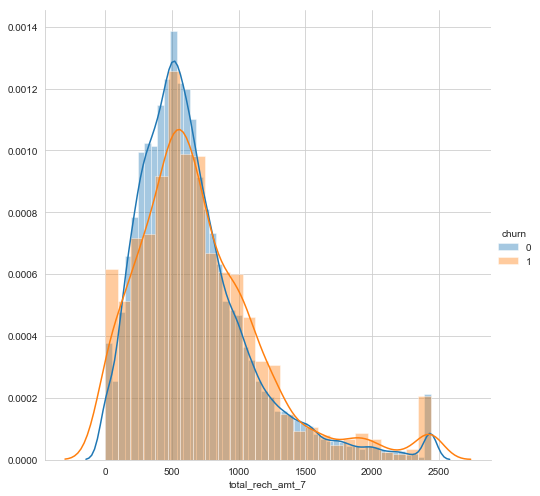

In [55]:
#feature importance of total_rech_amt_7
#now use histogram or probability density function for univiraite analysis
#one variable analysis
#this is important to know feature importance in classification
sns.FacetGrid(telecom,hue='churn',size=7).map(sns.distplot,"total_rech_amt_7").add_legend()

In [56]:
print("Mean:")
print(np.mean(df_not_churn["total_rech_amt_8"]))
print(np.mean(df_churn["total_rech_amt_8"]))
print("median:")
print(np.median(df_not_churn["total_rech_amt_8"]))
print(np.median(df_churn["total_rech_amt_8"]))

print("Quantiles:")
print(np.percentile(df_not_churn["total_rech_amt_8"],np.arange(0,100,25)))
print(np.percentile(df_churn["total_rech_amt_8"],np.arange(0,100,25)))

Mean:
606.5999331053997
343.55932330827073
median:
518.0
190.0
Quantiles:
[  0. 288. 518. 800.]
[  0.    16.5  190.   506.25]


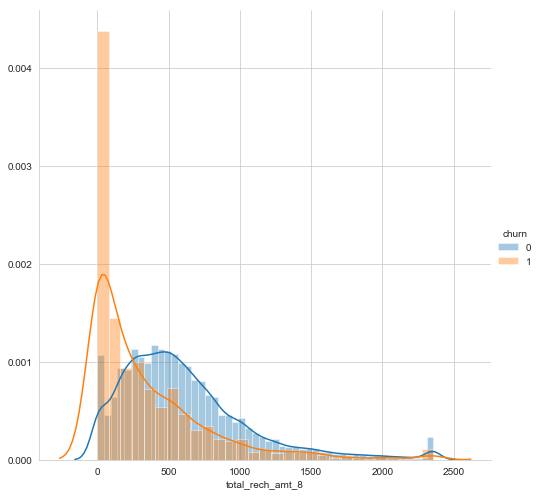

In [57]:
#feature importance of total_rech_amt_8
#now use histogram or probability density function for univiraite analysis
#one variable analysis
#this is important to know feature importance in classification
sns.FacetGrid(telecom,hue='churn',size=7).map(sns.distplot,"total_rech_amt_8").add_legend()

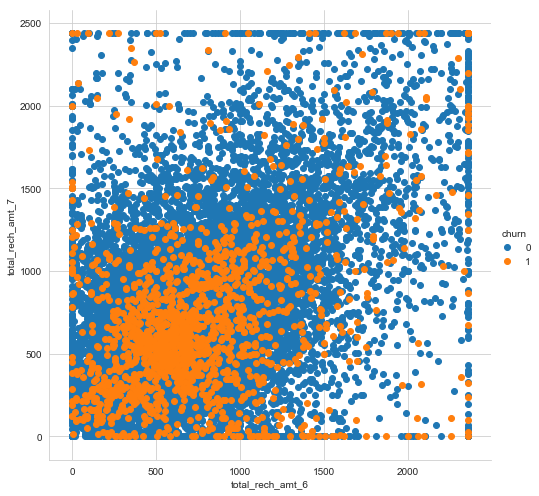

In [58]:
sns.FacetGrid(telecom,hue='churn',size=7).map(plt.scatter,"total_rech_amt_6","total_rech_amt_7").add_legend()

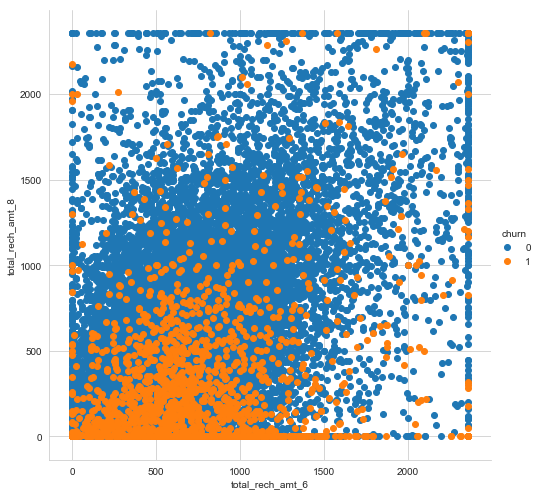

In [59]:
sns.FacetGrid(telecom,hue='churn',size=7).map(plt.scatter,"total_rech_amt_6","total_rech_amt_8").add_legend()

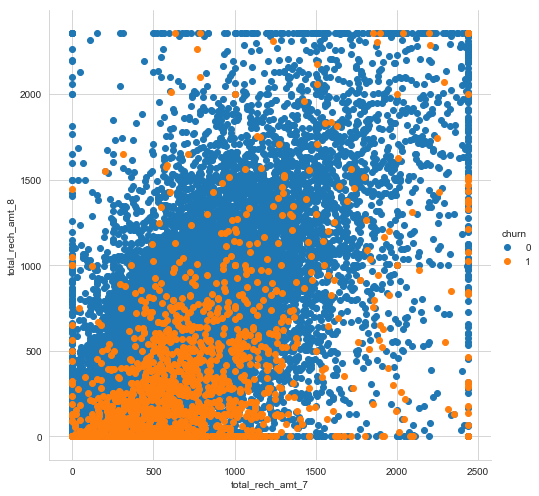

In [60]:
sns.FacetGrid(telecom,hue='churn',size=7).map(plt.scatter,"total_rech_amt_7","total_rech_amt_8").add_legend()

### Similar patterns are observed here as well. At the bottom, there are plenty of churning happening compare to higher values of "total_rech_amt_*".

### Univariate Analysis on max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',

In [61]:
print("Mean:")
print(np.mean(df_not_churn["max_rech_amt_6"]))
print(np.mean(df_churn["max_rech_amt_6"]))
print("median:")
print(np.median(df_not_churn["max_rech_amt_6"]))
print(np.median(df_churn["max_rech_amt_6"]))

print("Quantiles:")
print(np.percentile(df_not_churn["max_rech_amt_6"],np.arange(0,100,25)))
print(np.percentile(df_churn["max_rech_amt_6"],np.arange(0,100,25)))

Mean:
165.94354838709677
154.437343358396
median:
120.0
110.0
Quantiles:
[  0. 110. 120. 200.]
[  0. 100. 110. 154.]


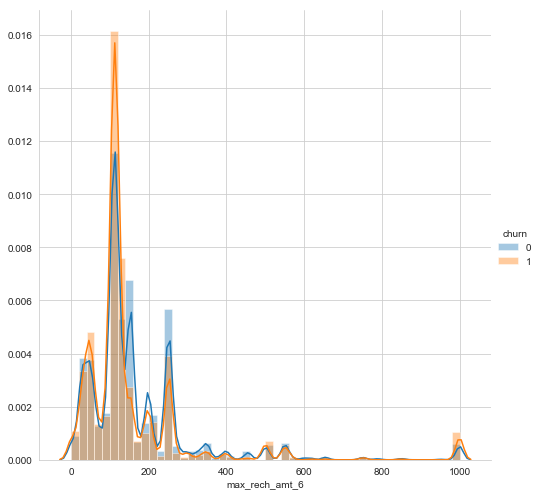

In [62]:
sns.FacetGrid(telecom,hue='churn',size=7).map(sns.distplot,"max_rech_amt_6").add_legend()

In [63]:
print("Mean:")
print(np.mean(df_not_churn["max_rech_amt_7"]))
print(np.mean(df_churn["max_rech_amt_7"]))
print("median:")
print(np.median(df_not_churn["max_rech_amt_7"]))
print(np.median(df_churn["max_rech_amt_7"]))

print("Quantiles:")
print(np.percentile(df_not_churn["max_rech_amt_7"],np.arange(0,100,25)))
print(np.percentile(df_churn["max_rech_amt_7"],np.arange(0,100,25)))

Mean:
169.3436152817006
152.63095238095238
median:
130.0
110.0
Quantiles:
[  0. 110. 130. 200.]
[  0.  98. 110. 154.]


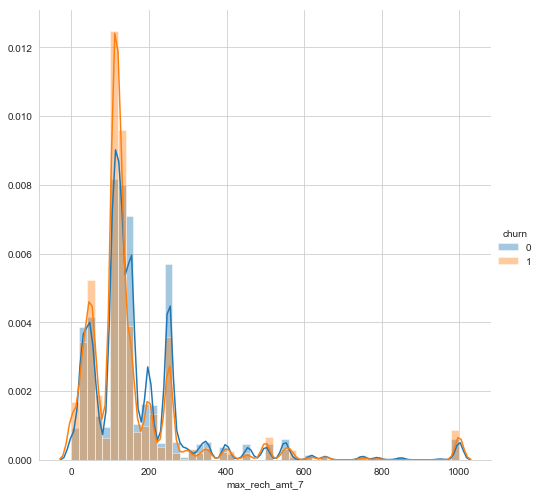

In [64]:
sns.FacetGrid(telecom,hue='churn',size=7).map(sns.distplot,"max_rech_amt_7").add_legend()

In [65]:
print("Mean:")
print(np.mean(df_not_churn["max_rech_amt_8"]))
print(np.mean(df_churn["max_rech_amt_8"]))
print("median:")
print(np.median(df_not_churn["max_rech_amt_8"]))
print(np.median(df_churn["max_rech_amt_8"]))

print("Quantiles:")
print(np.percentile(df_not_churn["max_rech_amt_8"],np.arange(0,100,25)))
print(np.percentile(df_churn["max_rech_amt_8"],np.arange(0,100,25)))

Mean:
163.66262821465736
105.58082706766918
median:
144.0
56.0
Quantiles:
[  0.  70. 144. 198.]
[  0.  10.  56. 130.]


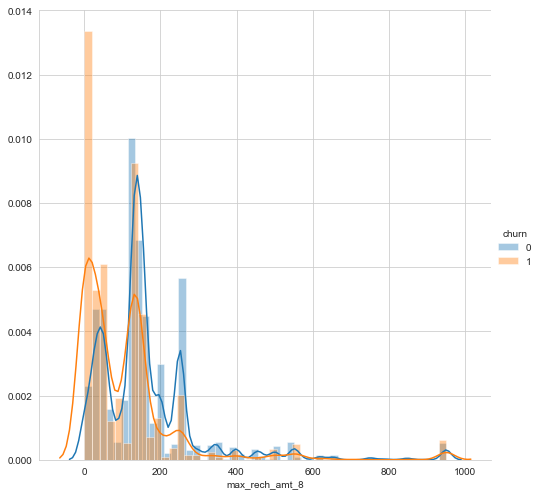

In [66]:
sns.FacetGrid(telecom,hue='churn',size=7).map(sns.distplot,"max_rech_amt_8").add_legend()

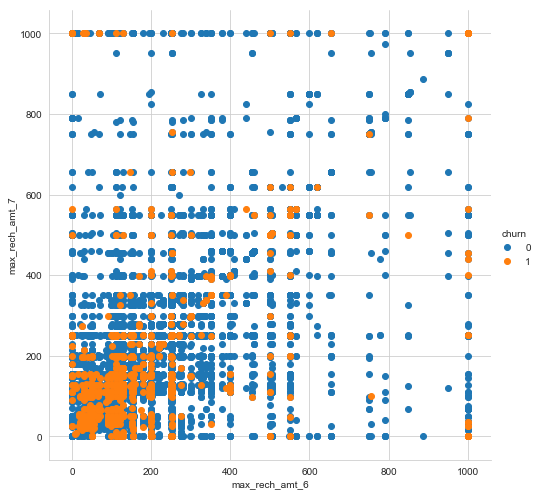

In [67]:
sns.FacetGrid(telecom,hue='churn',size=7).map(plt.scatter,"max_rech_amt_6","max_rech_amt_7").add_legend()

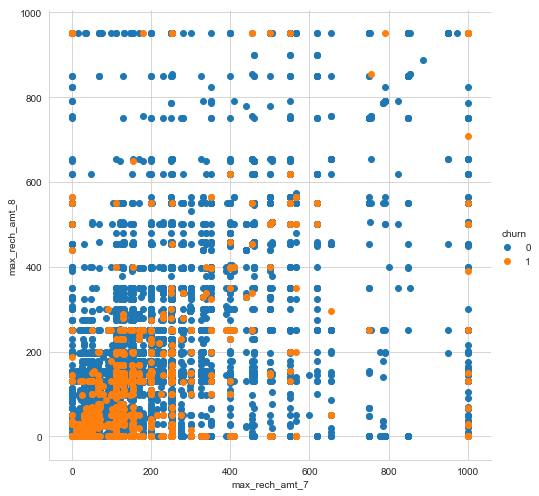

In [68]:
sns.FacetGrid(telecom,hue='churn',size=7).map(plt.scatter,"max_rech_amt_7","max_rech_amt_8").add_legend()

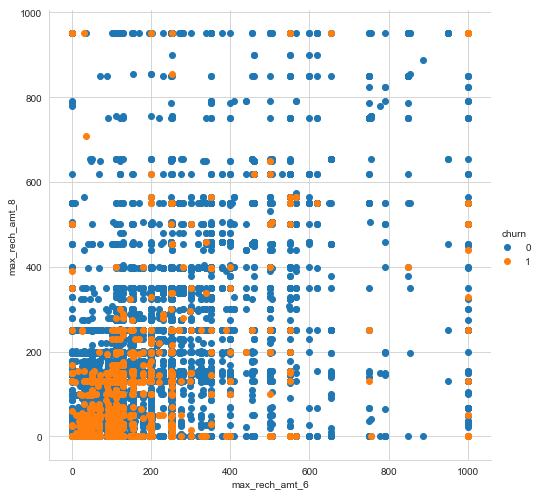

In [69]:
sns.FacetGrid(telecom,hue='churn',size=7).map(plt.scatter,"max_rech_amt_6","max_rech_amt_8").add_legend()

### Similar patterns are observed here as well. At the bottom, there are plenty of churning happening compare to higher values of "max_rech_amt_*".

### Due to space & size we will not include all univariate and bivariate analysis.

### Correlation Matrix: Bivariate Analysis

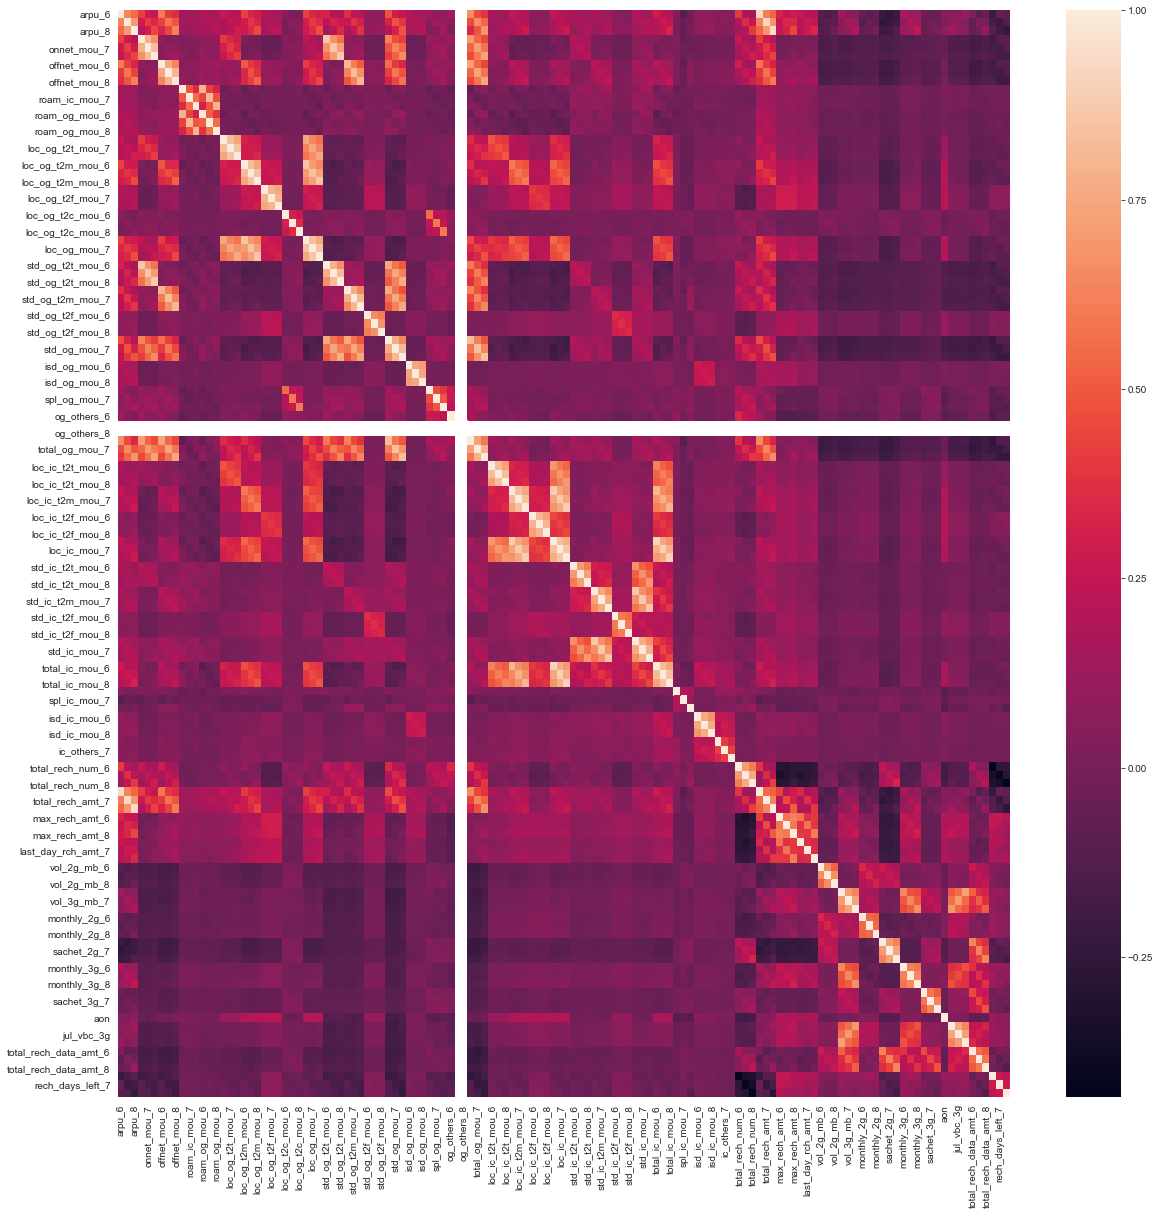

In [70]:
telecom2 = telecom.drop(['mobile_number', 'churn'], axis=1)

# Let's see the correlation matrix 
plt.figure(figsize = (20,20))        # Size of the figure
sns.heatmap(telecom2.corr())

In [71]:
# Create correlation matrix
corr_matrix = telecom2.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.80
high_corr_features = [column for column in upper.columns if any(upper[column] > 0.80)]

print("HIGHLY CORRELATED FEATURES IN DATA SET:{}\n\n{}".format(len(high_corr_features), high_corr_features))

HIGHLY CORRELATED FEATURES IN DATA SET:36

['onnet_mou_8', 'roam_og_mou_7', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8']


#### 36 highly correlated features (> 80%) found in the data set.
#### We will not drop these columns manually rather we will use feature reduction methods to do the job.

OBSERVATIONS
1. Data is higly imbalanced only 5.6% data is churn & remaining is non_churn
2. From Bivariate analysis some relationship is emerging to the churn.
3. There are many highly correlated features, found 36 features with more then 0.8 correlation.

## FEATURE REDUCTION & LOGISTIC REGRESSION

In [72]:
telecom.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,churn,rech_days_left_6,rech_days_left_7,rech_days_left_8
7,7.000702e+09,1069.180,1349.85000,1989.92211,57.84,54.68,52.29,453.43,567.16,325.91,...,57.74,19.3800,18.74,0.00,0.00,0.0,1,3.0,6.0,5.0
8,7.001525e+09,378.721,492.22300,137.36200,413.69,351.03,35.08,94.66,80.63,136.48,...,21.03,910.6500,122.16,0.00,354.00,207.0,0,5.0,0.0,1.0
21,7.002124e+09,514.453,597.75300,637.76000,102.41,132.11,85.14,757.93,896.68,983.39,...,0.00,0.0000,0.00,0.00,0.00,0.0,0,0.0,0.0,0.0
23,7.000887e+09,74.350,193.89700,366.96600,48.96,50.66,33.58,85.41,89.36,205.89,...,40.45,51.8600,0.00,0.00,712.00,540.0,0,12.0,18.0,7.0
33,7.000150e+09,977.020,1999.46235,409.23000,0.00,0.00,0.00,0.00,0.00,0.00,...,358.10,2075.2476,1714.67,5129.73,6219.16,455.0,0,0.0,1.0,5.0


In [73]:
# Drop mobile_number
telecom = telecom.drop(['mobile_number'], axis=1)

# Create X (independent variable) & y (dependent variable) 
df_telecom = telecom.drop(['churn'], axis=1)
X = telecom.drop(['churn'], axis=1)
y = telecom['churn']

In [74]:
X.shape

(28504, 130)

### Data Standardization/Normalization

In [75]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

### Split Data into Train & Test

In [76]:
# Split in train & Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

In [77]:
print("X_train Dataframe Shape {}".format(X_train.shape))
print("X_test Dataframe Shape {}".format(X_test.shape))

y_train_imb = (y_train != 0).sum()/(y_train == 0).sum()
y_test_imb = (y_test != 0).sum()/(y_test == 0).sum()
print("Imbalance in Train Data: {}".format(y_train_imb))
print("Imbalance in Test Data: {}".format(y_test_imb))

X_train Dataframe Shape (19952, 130)
X_test Dataframe Shape (8552, 130)
Imbalance in Train Data: 0.05941698083151914
Imbalance in Test Data: 0.059071207430340555


### Balance data set by SMOTE (Synthetic Minority Over-Sampling Technique)

It is one of the most adopted approaches due to its simplicity and effectiveness. It is a combination of oversampling and undersampling, but the oversampling approach is not by replicating minority class but constructing new minority class data instance via an algorithm.

In [78]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(kind = "regular")
X_tr,y_tr = sm.fit_sample(X_train,y_train)

In [79]:
print("X_tr Dataframe Shape {}".format(X_tr.shape))
print("y_tr Dataframe Shape {}".format(y_tr.shape))

data_imbalance = (y_tr != 0).sum()/(y_tr == 0).sum()
print("Imbalance in Train Data: {}".format(data_imbalance))

X_tr Dataframe Shape (37666, 130)
y_tr Dataframe Shape (37666,)
Imbalance in Train Data: 1.0


## Feature Reduction By Applying PCA

In [80]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(random_state=100)

#Doing the PCA on the train data
pca.fit(X_tr)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
  svd_solver='auto', tol=0.0, whiten=False)

In [81]:
df_train_pca = pca.fit_transform(X_tr)
print(df_train_pca.shape)

df_test_pca = pca.transform(X_test)
print(df_test_pca.shape)

(37666, 130)
(8552, 130)


In [82]:
pca.components_

array([[ 1.78230990e-01,  1.99715657e-01,  1.70634638e-01, ...,
        -5.78396754e-02, -5.88470969e-02, -4.59307657e-02],
       [-1.71202918e-02, -2.66105200e-03,  7.83130616e-02, ...,
         5.85152809e-02,  2.51494224e-02,  7.68720879e-03],
       [ 8.21762937e-02,  7.48983082e-02,  8.12829855e-02, ...,
         2.98862086e-02,  3.63213627e-02, -1.74861616e-03],
       ...,
       [-1.77440665e-03,  4.11399601e-04,  6.42581701e-04, ...,
        -9.01524198e-04,  1.10996947e-04,  1.15868972e-04],
       [-0.00000000e+00,  3.67151779e-18,  2.23817592e-17, ...,
        -5.90478486e-17, -1.44670746e-16,  1.19606266e-16],
       [ 0.00000000e+00, -9.96017848e-17, -2.87886792e-16, ...,
         2.02987577e-17, -1.57652083e-16,  7.73691324e-19]])

In [83]:
pca.explained_variance_ratio_

array([1.21608908e-01, 1.07676300e-01, 6.90600798e-02, 4.69941913e-02,
       4.61520576e-02, 4.16671385e-02, 3.92955667e-02, 3.20627586e-02,
       2.82058605e-02, 2.05259524e-02, 1.91609970e-02, 1.86722492e-02,
       1.76361164e-02, 1.62617608e-02, 1.60354666e-02, 1.42657236e-02,
       1.39181220e-02, 1.32188451e-02, 1.25278729e-02, 1.20392983e-02,
       1.04526246e-02, 9.95800749e-03, 9.51774000e-03, 9.31119135e-03,
       8.35071960e-03, 8.28695547e-03, 8.27535845e-03, 7.60965247e-03,
       7.38464793e-03, 7.27854506e-03, 7.20158156e-03, 6.77190505e-03,
       6.52893568e-03, 6.24566338e-03, 6.17938204e-03, 6.08183104e-03,
       5.86217725e-03, 5.64848100e-03, 5.53699678e-03, 5.43961449e-03,
       5.21880040e-03, 5.05235581e-03, 4.98141092e-03, 4.66255626e-03,
       4.59318532e-03, 4.38747398e-03, 4.38284638e-03, 4.33052605e-03,
       4.27890861e-03, 4.15576145e-03, 3.79748199e-03, 3.77024046e-03,
       3.61692025e-03, 3.45697570e-03, 3.24102879e-03, 3.10867659e-03,
      

In [84]:
colnames = list(telecom.drop(['churn'],axis=1).columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'Feature':colnames})
pcs_df.head(10)

,PC1,PC2,PC3,Feature
0,0.178231,-0.017120,0.082176,arpu_6
1,0.199716,-0.002661,0.074898,arpu_7
2,0.170635,0.078313,0.081283,arpu_8
3,0.136499,-0.134259,-0.041377,onnet_mou_6
4,0.148294,-0.117678,-0.052369,onnet_mou_7
5,0.126771,-0.044584,-0.027416,onnet_mou_8
6,0.176712,-0.069080,0.027135,offnet_mou_6
7,0.190545,-0.057965,0.017795,offnet_mou_7
8,0.157092,0.019517,0.023040,offnet_mou_8
9,0.014708,0.000578,0.290143,roam_ic_mou_6


### Key features are arpu_6, arpu_7, arpu_8, onnet_mou_6, onnet_mou_7, onnet_mou_8, offnet_mou_6, offnet_mou_7, offnet_mou_8, roam_ic_mou_6

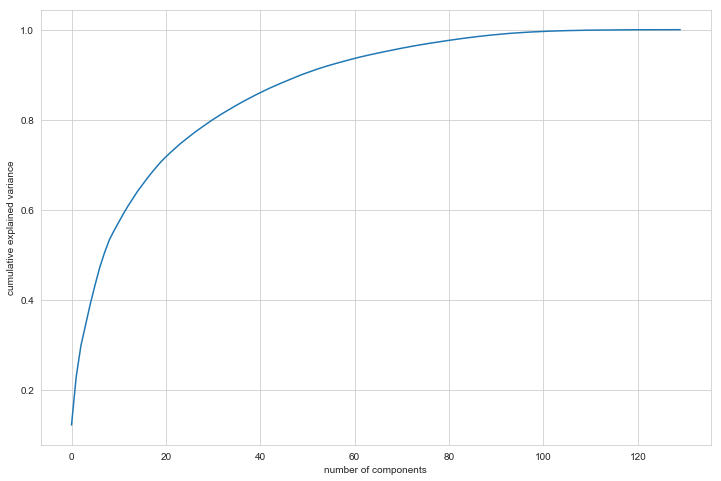

In [85]:
#Plotting the scree plot
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [86]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 12.16,  22.93,  29.84,  34.54,  39.16,  43.33,  47.26,  50.47,
        53.29,  55.34,  57.26,  59.13,  60.89,  62.52,  64.12,  65.55,
        66.94,  68.26,  69.51,  70.71,  71.76,  72.76,  73.71,  74.64,
        75.48,  76.31,  77.14,  77.9 ,  78.64,  79.37,  80.09,  80.77,
        81.42,  82.04,  82.66,  83.27,  83.86,  84.42,  84.97,  85.51,
        86.03,  86.54,  87.04,  87.51,  87.97,  88.41,  88.85,  89.28,
        89.71,  90.13,  90.51,  90.89,  91.25,  91.6 ,  91.92,  92.23,
        92.53,  92.82,  93.1 ,  93.38,  93.65,  93.91,  94.16,  94.4 ,
        94.63,  94.85,  95.07,  95.29,  95.5 ,  95.71,  95.92,  96.12,
        96.31,  96.5 ,  96.68,  96.85,  97.02,  97.19,  97.35,  97.51,
        97.67,  97.82,  97.96,  98.1 ,  98.24,  98.37,  98.49,  98.61,
        98.73,  98.84,  98.94,  99.04,  99.13,  99.22,  99.29,  99.36,
        99.43,  99.49,  99.54,  99.59,  99.64,  99.68,  99.72,  99.75,
        99.78,  99.81,  99.84,  99.86,  99.88,  99.9 ,  99.91,  99.92,
      

### Clearly around 90% of the data is properly explained by the first 48 principal components.

## Apply logistic regression

In [87]:
pca48 = PCA(n_components=48)

In [88]:
df_train_pca48 = pca48.fit_transform(X_tr)
print(df_train_pca48.shape)
df_test_pca48 = pca48.transform(X_test)
print(df_test_pca48.shape)

(37666, 48)
(8552, 48)


In [89]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk1 = LogisticRegression(C=1e9)
logsk1.fit(df_train_pca48, y_tr)

# Predicted probabilities
y_pred48 = logsk1.predict(df_test_pca48)
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred48)

In [90]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [91]:
# Printing confusion matrix
print(confusion_matrix(y_test,y_pred48))

[[6653 1422]
 [  97  380]]


In [92]:
print("LogisticRegression accuracy with PCA: ",accuracy_score(y_test,y_pred48))

LogisticRegression accuracy with PCA:  0.8223807296538821


### Logistic Regression model has False Positive Rate of 17%, which is very high.

### Now we have created our base model (logistic regression model). Let's go for some other models like "decision tree" and "random forest" to see if it improves performance.

## Decision Tree with default hyperparameter

### Feature reduction using LASSO

In [95]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
 
lsvc = LinearSVC(C=0.001, penalty="l1", dual=False).fit(X_tr, y_tr)
model = SelectFromModel(lsvc, prefit=True)
X_lasso = model.transform(X_tr)
pos = model.get_support(indices=True)
 ### Feature reduction using RFE
print(X_lasso.shape)
print(pos)

(37666, 44)
[  1   3   7   8  10  14  20  23  29  34  38  39  42  47  53  59  62  65
  68  69  71  77  79  80  82  83  84  89  91  92 101 102 104 107 108 109
 110 113 116 120 121 127 128 129]


In [96]:
#feature vector for decision tree#feature 
lasso_features = list(df_telecom.columns[pos])
print("Features identified by LASSO for model buidling: ", lasso_features)

Features identified by LASSO for model buidling:  ['arpu_7', 'onnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_7', 'roam_og_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_mou_8', 'std_og_t2m_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_8', 'total_og_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_8', 'std_ic_mou_8', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6', 'ic_others_8', 'total_rech_num_7', 'total_rech_num_8', 'last_day_rch_amt_8', 'vol_2g_mb_6', 'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'aon', 'aug_vbc_3g', 'rech_days_left_6', 'rech_days_left_7', 'rech_days_left_8']


In [97]:
X_train = X_lasso
y_train = y_tr

In [98]:
print ("Feature space holds %d observations and %d features" % X_train.shape)
print ("Unique target labels:", np.unique(y_train))

Feature space holds 37666 observations and 44 features
Unique target labels: [0 1]


### Decision Tree with default hyperparameter

In [99]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [100]:
# Let's check the evaluation metrics of our default model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
X_test = pd.DataFrame(data=X_test).iloc[:, pos]
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

             precision    recall  f1-score   support

          0       0.98      0.87      0.92      8075
          1       0.24      0.69      0.36       477

avg / total       0.94      0.86      0.89      8552



In [101]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[7054 1021]
 [ 148  329]]
0.8633068288119738


### Decision Tree has False Positive Rate of 12%, which is better than Logistic regression.

### Hyperparameter Tuning

### Tuning max_depth

In [136]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(1, 40)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [137]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.113131,0.002923,0.001998,1.482036e-06,1,{'max_depth': 1},0.769711,0.800903,0.801301,0.795008,...,0.793262,0.011986,39,0.799150,0.791351,0.791252,0.792825,0.791730,0.793262,0.002997
1,0.185886,0.000894,0.001799,3.985894e-04,2,{'max_depth': 2},0.778869,0.800903,0.819087,0.806691,...,0.804890,0.014794,38,0.815744,0.797757,0.805655,0.808787,0.805734,0.806736,0.005799
2,0.268235,0.003259,0.001999,5.135693e-07,3,{'max_depth': 3},0.795992,0.822405,0.833156,0.818906,...,0.817130,0.012153,37,0.821784,0.815114,0.815877,0.818809,0.820137,0.818344,0.002521
3,0.329195,0.003317,0.001999,7.599534e-07,4,{'max_depth': 4},0.841253,0.858774,0.868330,0.860196,...,0.858413,0.009189,36,0.871631,0.857062,0.857792,0.862813,0.858631,0.861586,0.005404
4,0.402554,0.010622,0.001997,3.722996e-06,5,{'max_depth': 5},0.860234,0.889036,0.895009,0.887148,...,0.883662,0.012076,35,0.891345,0.882417,0.883181,0.886739,0.884018,0.885540,0.003249


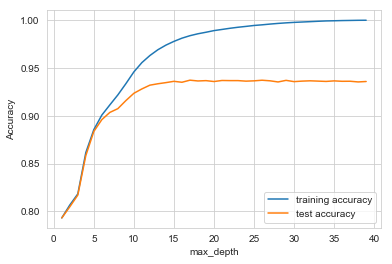

In [138]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

conclusion for max depth: You can see that as we increase the value of max_depth, both training and test score increase till about max-depth = 10, after which the test score is constant. Note that the scores are average accuracies across the 5-folds.

we can consider max_depth=10

### Tuning min_samples_leaf

In [140]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_leaf': range(5, 200, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [141]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.146494,0.075528,0.002397,0.000488,5,{'min_samples_leaf': 5},0.895938,0.934032,0.943855,0.940919,...,0.930627,0.017642,1,0.977068,0.971924,0.973782,0.974082,0.971527,0.973677,0.001968
1,0.964206,0.040052,0.002599,0.000490,25,{'min_samples_leaf': 25},0.889036,0.913061,0.930050,0.926978,...,0.916822,0.015040,2,0.941424,0.932796,0.934721,0.933829,0.934791,0.935512,0.003043
2,0.868265,0.017510,0.002198,0.000400,45,{'min_samples_leaf': 45},0.883727,0.910273,0.926334,0.919411,...,0.911140,0.014661,3,0.929411,0.919952,0.924565,0.923575,0.922480,0.923996,0.003114
3,0.814098,0.021150,0.002000,0.000001,65,{'min_samples_leaf': 65},0.877356,0.908813,0.920096,0.908789,...,0.906786,0.015477,4,0.921379,0.912917,0.914111,0.914382,0.916440,0.915846,0.002990
4,0.780118,0.024888,0.002000,0.000003,85,{'min_samples_leaf': 85},0.869658,0.903637,0.913459,0.909851,...,0.901715,0.016376,5,0.917596,0.907042,0.908569,0.910433,0.909836,0.910695,0.003641


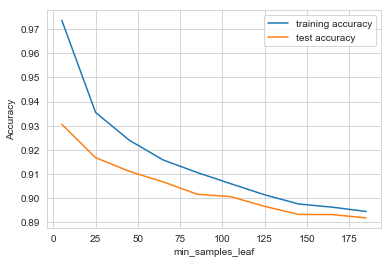

In [142]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

conclusion for min_samples_leaf: at low values of min_samples_leaf seems overfitted. At values 125,the model becomes more stable and the training and test accuracy start to converge. min_samples_leaf=125

### Tuning min_samples_split

In [143]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': range(5, 200, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [144]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.244834,0.054172,0.002798,0.000400,5,{'min_samples_split': 5},0.900451,0.941598,0.941731,0.940653,...,0.933521,0.016556,1,0.996416,0.995055,0.994723,0.994458,0.995255,0.995181,0.000675
1,1.223647,0.057308,0.002798,0.000400,25,{'min_samples_split': 25},0.888638,0.932440,0.939076,0.938927,...,0.927600,0.019646,2,0.977034,0.971459,0.970065,0.971096,0.972490,0.972429,0.002430
2,1.209456,0.054984,0.002797,0.000399,45,{'min_samples_split': 45},0.882267,0.931245,0.937218,0.934811,...,0.923724,0.020823,3,0.965850,0.955363,0.958516,0.957589,0.956893,0.958842,0.003652
3,1.203459,0.055657,0.002398,0.000489,65,{'min_samples_split': 65},0.880807,0.927661,0.933369,0.930828,...,0.920034,0.019735,4,0.956525,0.946303,0.950153,0.950421,0.947601,0.950200,0.003521
4,1.194464,0.055089,0.002199,0.000401,85,{'min_samples_split': 85},0.882665,0.925272,0.932572,0.928571,...,0.918388,0.018158,5,0.951646,0.939699,0.944345,0.944714,0.940167,0.944114,0.004295


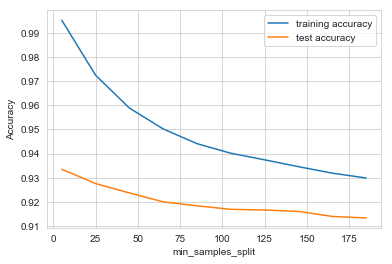

In [145]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

as increase min_samples_split, the tree overfits lesser since the model is less complex

In [146]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   54.9s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(5, 15, 5), 'min_samples_leaf': range(50, 150, 50), 'min_samples_split': range(50, 150, 50), 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [147]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.648001,0.008329,0.001999,1.168008e-07,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.856783,...,0.879918,0.012207,13,0.890050,0.882550,0.878169,0.881430,0.881463,0.882732,0.003943
1,0.651399,0.008813,0.001999,1.784161e-07,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.856783,...,0.879918,0.012207,13,0.890050,0.882550,0.878169,0.881430,0.881463,0.882732,0.003943
2,0.632410,0.005632,0.001999,1.507891e-07,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.849350,...,0.875697,0.013567,15,0.886533,0.878534,0.874486,0.877547,0.879073,0.879235,0.003979
3,0.633810,0.007700,0.001999,2.861023e-07,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.849350,...,0.875697,0.013567,15,0.886533,0.878534,0.874486,0.877547,0.879073,0.879235,0.003979
4,1.060346,0.013732,0.002199,3.997329e-04,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.878020,...,0.906892,0.014657,3,0.921180,0.917297,0.916567,0.916307,0.917535,0.917777,0.001760
5,1.051752,0.011247,0.001999,6.325960e-07,entropy,10,50,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.878020,...,0.906892,0.014657,3,0.921180,0.917297,0.916567,0.916307,0.917535,0.917777,0.001760
6,0.976398,0.013805,0.001999,2.780415e-07,entropy,10,100,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.855721,...,0.892449,0.018388,7,0.907739,0.900471,0.901002,0.901142,0.901805,0.902432,0.002688
7,0.974400,0.016960,0.001999,1.029350e-06,entropy,10,100,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.855721,...,0.892449,0.018388,7,0.907739,0.900471,0.901002,0.901142,0.901805,0.902432,0.002688
8,0.396356,0.001623,0.001999,4.101908e-07,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.859703,...,0.882732,0.012048,9,0.890615,0.881355,0.882019,0.884914,0.882160,0.884213,0.003425
9,0.405350,0.012266,0.001999,1.168008e-07,gini,5,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.859703,...,0.882732,0.012048,9,0.890615,0.881355,0.882019,0.884914,0.882160,0.884213,0.003425


In [148]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.9084054585036904
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [149]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [150]:
# accuracy score
clf_gini.score(X_test,y_test)

0.8903180542563143

## DECISSION TREE OBSERVATIONS
#### 1. 44 features identified by LASSO for model buiding.
#### 2. Getting around 90% accuracy.
#### 3. Confusion matix shows lot of false positives still exist (12%).

### Random Forest with default hyperparameter

In [102]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### Feature reduction using LASSO

In [120]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
 
lsvc = LinearSVC(C=0.001, penalty="l1", dual=False).fit(X_tr, y_tr)
model = SelectFromModel(lsvc, prefit=True)
X_lasso = model.transform(X_tr)
pos2 = model.get_support(indices=True)
 ### Feature reduction using RFE
print(X_lasso.shape)
print(pos2)

(37666, 44)
[  1   3   7   8  10  14  20  23  29  34  38  39  42  47  53  59  62  65
  68  69  71  77  79  80  82  83  84  89  91  92 101 102 104 107 108 109
 110 113 116 120 121 127 128 129]


In [121]:
#feature vector for decision tree#feature 
lasso_features = list(df_telecom.columns[pos2])
print("Features identified by LASSO for model buidling: ", lasso_features)

Features identified by LASSO for model buidling:  ['arpu_7', 'onnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_7', 'roam_og_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_mou_8', 'std_og_t2m_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_8', 'total_og_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_8', 'std_ic_mou_8', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6', 'ic_others_8', 'total_rech_num_7', 'total_rech_num_8', 'last_day_rch_amt_8', 'vol_2g_mb_6', 'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'aon', 'aug_vbc_3g', 'rech_days_left_6', 'rech_days_left_7', 'rech_days_left_8']


In [122]:
X_train = X_lasso
y_train = y_tr

In [123]:
print ("Feature space holds %d observations and %d features" % X_train.shape)
print ("Unique target labels:", np.unique(y_train))

Feature space holds 37666 observations and 44 features
Unique target labels: [0 1]


In [124]:
# fit Random Forest
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [131]:
# Making predictions
X_test = pd.DataFrame(data=X_test).loc[:, pos2]

predictions = rfc.predict(X_test)

In [132]:
# Importing classification report and confusion matrix from sklearn metrics
#from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
# Let's check the report of our default model
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.97      0.97      0.97      8075
          1       0.47      0.49      0.48       477

avg / total       0.94      0.94      0.94      8552



In [133]:
# Printing confusion matrix
print(confusion_matrix(y_test, predictions))

[[7811  264]
 [ 245  232]]


In [134]:
print(accuracy_score(y_test, predictions))

0.9404817586529467


### Hyperparameter Tuning

### Tuning max_depth

In [151]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(2, 20, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [152]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.206472,0.008725,0.006197,0.000400,2,{'max_depth': 2},0.783249,0.837006,0.849482,0.834307,...,0.832847,0.026474,4,0.793840,0.843821,0.841199,0.834274,0.849771,0.832581,0.019999
1,0.528875,0.004618,0.008794,0.000398,7,{'max_depth': 7},0.884656,0.909477,0.913857,0.914498,...,0.907184,0.011401,3,0.923404,0.913713,0.911622,0.918033,0.913586,0.916072,0.004222
2,0.739545,0.016555,0.010394,0.000490,12,{'max_depth': 12},0.932705,0.952349,0.959915,0.952735,...,0.950406,0.009256,2,0.977997,0.973882,0.972786,0.974613,0.972921,0.974440,0.001899
3,0.870463,0.011021,0.011194,0.000399,17,{'max_depth': 17},0.936156,0.961906,0.968941,0.966676,...,0.959778,0.012031,1,0.989081,0.988152,0.988285,0.988883,0.988153,0.988511,0.000393


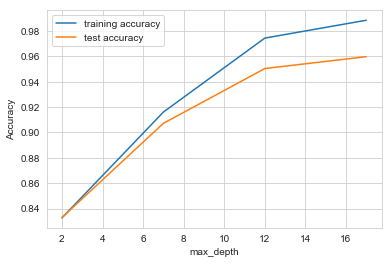

In [153]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning n_estimators

In [154]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': range(100, 1500, 400)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [155]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.003950,0.054535,0.052768,0.000747,100,{'n_estimators': 100},0.855190,0.868994,0.881338,0.871349,...,0.870334,0.008640,2,0.880393,0.872196,0.869673,0.871109,0.867923,0.872259,0.004312
1,14.644778,0.055676,0.252043,0.002924,500,{'n_estimators': 500},0.852801,0.868330,0.880674,0.871349,...,0.870281,0.009819,3,0.878037,0.871897,0.869806,0.871540,0.869715,0.872199,0.003050
2,26.330976,0.031852,0.450123,0.001354,900,{'n_estimators': 900},0.854261,0.868065,0.881205,0.872411,...,0.870785,0.009419,1,0.878335,0.871864,0.871067,0.872702,0.869848,0.872763,0.002941
3,38.016976,0.161757,0.649598,0.002276,1300,{'n_estimators': 1300},0.853995,0.866605,0.881338,0.871349,...,0.870175,0.009545,4,0.878103,0.870735,0.870271,0.871872,0.869682,0.872133,0.003070


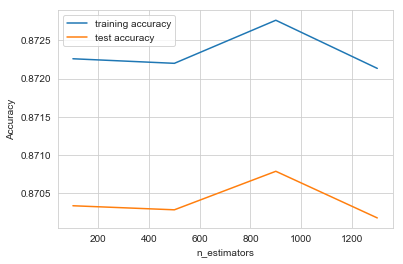

In [156]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning max_features

In [160]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24,28,32,36,40,44]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': [4, 8, 14, 20, 24, 28, 32, 36, 40, 44]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [161]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.246048,0.008227,0.007196,4.004718e-04,4,{'max_features': 4},0.842713,0.851872,0.859304,0.862985,...,0.854882,0.007063,10,0.867749,0.855834,0.850126,0.864406,0.852293,0.858082,0.006860
1,0.420341,0.010301,0.006996,7.776979e-07,8,{'max_features': 8},0.845899,0.870454,0.861163,0.866304,...,0.861732,0.008458,9,0.868777,0.869972,0.853644,0.869151,0.858499,0.864009,0.006671
2,0.680380,0.020727,0.007196,3.998522e-04,14,{'max_features': 14},0.857844,0.872179,0.882134,0.871349,...,0.874343,0.010381,5,0.884641,0.876178,0.873556,0.873332,0.877680,0.877078,0.004118
3,0.917835,0.009639,0.006797,4.003787e-04,20,{'max_features': 20},0.855588,0.874038,0.894213,0.888609,...,0.877715,0.013391,1,0.883612,0.871300,0.883844,0.888631,0.867857,0.879049,0.008012
4,1.093526,0.022714,0.006796,3.998041e-04,24,{'max_features': 24},0.846297,0.870454,0.885851,0.872544,...,0.873148,0.015457,7,0.871997,0.870901,0.876709,0.873963,0.883852,0.875484,0.004626


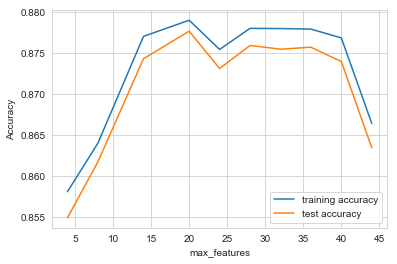

In [162]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning min_samples_leaf

In [163]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_leaf': range(100, 400, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [165]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.643004,0.021919,0.009396,0.000490,100,{'min_samples_leaf': 100},0.883462,0.901646,0.912663,0.908391,...,0.903255,0.010549,1,0.920019,0.906910,0.908138,0.907978,0.904726,0.909554,0.005372
1,0.577644,0.011001,0.008995,0.000002,150,{'min_samples_leaf': 150},0.874303,0.894877,0.906026,0.901221,...,0.896485,0.011821,2,0.911622,0.897883,0.898248,0.900577,0.899051,0.901476,0.005157
2,0.531674,0.015118,0.008394,0.000488,200,{'min_samples_leaf': 200},0.866472,0.890231,0.892089,0.893654,...,0.887379,0.010553,3,0.898380,0.892274,0.882251,0.891750,0.890987,0.891129,0.005160
3,0.526076,0.014560,0.008595,0.000490,250,{'min_samples_leaf': 250},0.864879,0.882400,0.899257,0.883962,...,0.886051,0.012871,4,0.893037,0.885404,0.887926,0.882359,0.888598,0.887465,0.003546
4,0.490498,0.008055,0.008595,0.000489,300,{'min_samples_leaf': 300},0.860632,0.875896,0.894744,0.887148,...,0.882467,0.012836,5,0.889553,0.880127,0.883513,0.885312,0.887901,0.885281,0.003311


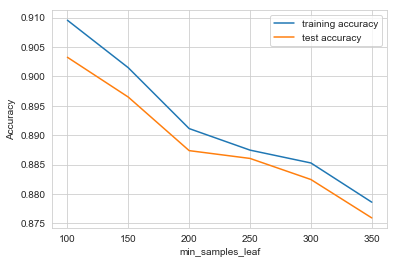

In [166]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning min_samples_split

In [167]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': range(200, 500, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [168]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.881656,0.024927,0.010594,0.000490,200,{'min_samples_split': 200},0.891293,0.923148,0.935758,0.926580,...,0.920592,0.015246,1,0.938305,0.929145,0.934223,0.931373,0.929150,0.932439,0.003475
1,0.857869,0.020066,0.010594,0.000489,250,{'min_samples_split': 250},0.887975,0.924343,0.926599,0.919012,...,0.915892,0.014192,2,0.933327,0.927220,0.925793,0.923276,0.918763,0.925676,0.004785
2,0.829489,0.028443,0.009994,0.000632,300,{'min_samples_split': 300},0.881736,0.913061,0.919299,0.918614,...,0.910689,0.014710,3,0.928116,0.916501,0.918724,0.920920,0.919227,0.920698,0.003969
3,0.795710,0.023771,0.009794,0.000400,350,{'min_samples_split': 350},0.884922,0.911203,0.920494,0.911445,...,0.909653,0.013009,4,0.927685,0.912883,0.916733,0.914051,0.912989,0.916868,0.005584
4,0.800507,0.021629,0.009794,0.000400,400,{'min_samples_split': 400},0.880674,0.915583,0.916910,0.906267,...,0.907264,0.013878,5,0.921346,0.918625,0.909996,0.907214,0.912657,0.913968,0.005277


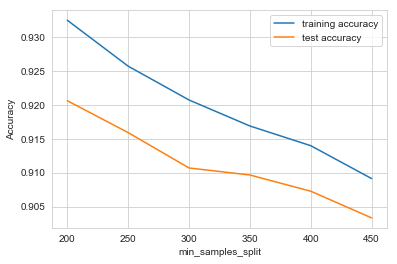

In [169]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Grid Search to Find Optimal Hyperparameters

In [172]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10,20,30,40,44]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [173]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   44.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 35.8min
[Parallel(n_jobs=-1)]: Done 648 out of 648 | elapsed: 59.5min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [4, 8, 10], 'min_samples_leaf': range(100, 400, 200), 'min_samples_split': range(200, 500, 200), 'n_estimators': [100, 200, 300], 'max_features': [5, 10, 20, 30, 40, 44]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [174]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9073965910901078 using {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 100}


In [175]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=100)

In [176]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=200,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [177]:
# predict
predictions = rfc.predict(X_test)

In [178]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

             precision    recall  f1-score   support

          0       0.98      0.92      0.95      8075
          1       0.35      0.72      0.47       477

avg / total       0.95      0.91      0.92      8552

[[7436  639]
 [ 133  344]]


### RANDOM FOREST OBSERVATIONS

#### 1. Getting 90% accuracy with False Positive Rate of 7%.
#### 2. Confusion matix clearly improved a lot, false positives still exist but reduced.

## Results:
### 1. Identified dominant features are arpu_6, arpu_7, arpu_8, onnet_mou_6, onnet_mou_7, onnet_mou_8, offnet_mou_6, roam_ic_mou_6
### 2.  Model which gives best accuracy and False Positive Rate : "Random Forest"